In [7]:
%pip install --break-system-packages pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

  Using cached pandas-2.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.7-cp314-cp314-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp314-cp314-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp314-cp314-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp314-cp314-macosx_11_0_arm64.whl (10.8 MB)
Using cached matplotlib-3.10.7-cp314-cp314-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp314

In [8]:
df = pd.read_csv("S02-hw-dataset.csv")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [10]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [11]:
#доля пропусков
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [16]:
#доля дубликатов
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [19]:
df[df['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Выявлено ненормальное значение возраста и отрицательное количество купленных товаров  

In [21]:
df[df["revenue"] == 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


Также обнаружен нулевой доход при ненулевом количестве товаров

### EDA

In [22]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [27]:
df.groupby("user_id")["revenue"].agg(["sum", "mean"])

,sum,mean
user_id,,
1,749,749.0
2,1115,1115.0
3,399,399.0
4,654,654.0
5,1296,1296.0
6,785,785.0
7,0,0.0
8,456,456.0
9,980,980.0


По результатам разведочного анализа было выявлено несколько значений стран, из которых доминируют Россия и Франция


Средние значения таковы: 
- возраст 37 лет
- количество товаров 5 штук
- доход 820


Неожиданные значения достигаются в результате выбросов, таких как возраст > 100 и нулевой доход при ненулевом количестве товаров

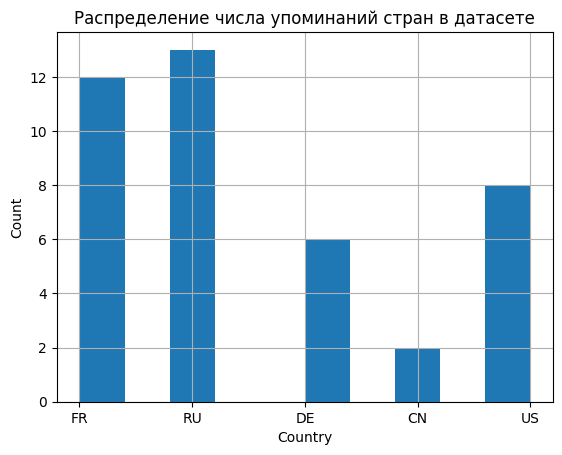

In [45]:
plt.hist(df["country"], bins=10)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Распределение числа упоминаний стран в датасете")
plt.grid()
plt.show()

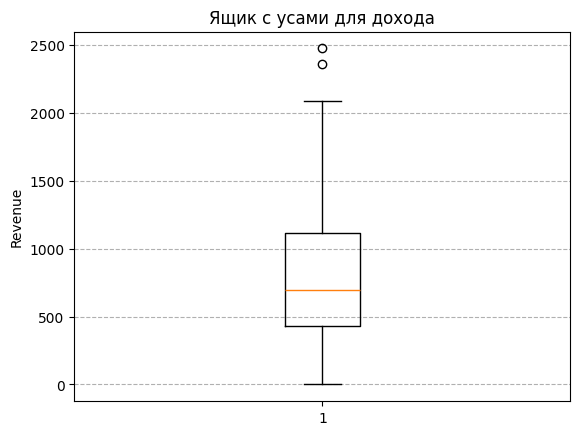

In [51]:
plt.boxplot(df["revenue"])
plt.ylabel("Revenue")
plt.title("Ящик с усами для дохода")
plt.grid(axis="y", linestyle="--")
plt.show()

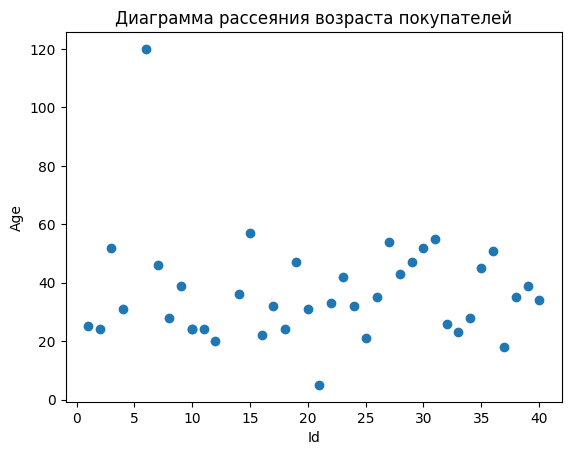

In [61]:
plt.scatter(df["user_id"], df["age"])
plt.xlabel("Id")
plt.ylabel("Age")
plt.title("Диаграмма рассеяния возраста покупателей")
plt.savefig("figures/scatter.png")
plt.show()
